In [1]:
%run "Common setup.ipynb"

In [2]:
from SALib.analyze.rbd_fast import analyze as rbd_analyze

In [3]:
template_df = pd.read_csv(f'{DATA_DIR}example_sample.csv', index_col=0)
is_perturbed = (template_df != template_df.iloc[0]).any()
perturbed_cols = template_df.loc[:, is_perturbed].columns

In [4]:
### With more samples...

numeric_samples = pd.read_csv(f'{DATA_DIR}moat_10_numeric_samples.csv', index_col=0)
numeric_samples = numeric_samples[perturbed_cols]
numeric_vals = numeric_samples.values

In [5]:
# Coupling disabled
moat_10_no_irrigation_results = pd.read_csv(f'{DATA_DIR}moat_no_irrigation_10_results.csv', index_col=0)
moat_10_no_irrigation_results['Avg. $/ML'].fillna(moat_10_no_irrigation_results["Avg. Annual Profit ($M)"], inplace=True)

np_res = moat_10_no_irrigation_results.values

res, idx = [], []
for reps in range(2, np_res.shape[0]):
    rbd_fast_results = rbd_analyze(CIM_SPEC, numeric_vals[:reps, :], 
                                       np_res[:reps], 
                                       M=4, seed=101)

    disabled = rbd_fast_results.to_df()
    tmp = disabled.loc[tgt_param, 'S1']
    res.append(tmp)
    idx.append(reps)
# End for

disabled = pd.DataFrame({'S1':res}, index=idx)

In [6]:
# Coupling enabled

moat_10_with_irrigation_results = pd.read_csv(f'{DATA_DIR}moat_with_irrigation_10_results.csv', index_col=0)
moat_10_with_irrigation_results['Avg. $/ML'].fillna(moat_10_with_irrigation_results["Avg. Annual Profit ($M)"], inplace=True)
np_res = moat_10_with_irrigation_results.values

res, idx = [], []
for reps in range(2, np_res.shape[0]):
    rbd_fast_results = rbd_analyze(CIM_SPEC, numeric_vals[:reps, :], 
                                       np_res[:reps], 
                                       M=4, seed=101)
    
    enabled = rbd_fast_results.to_df()
    tmp = enabled.loc[tgt_param, 'S1']
    res.append(tmp)
    idx.append(reps)
# End for

enabled = pd.DataFrame({'S1':res}, index=idx)

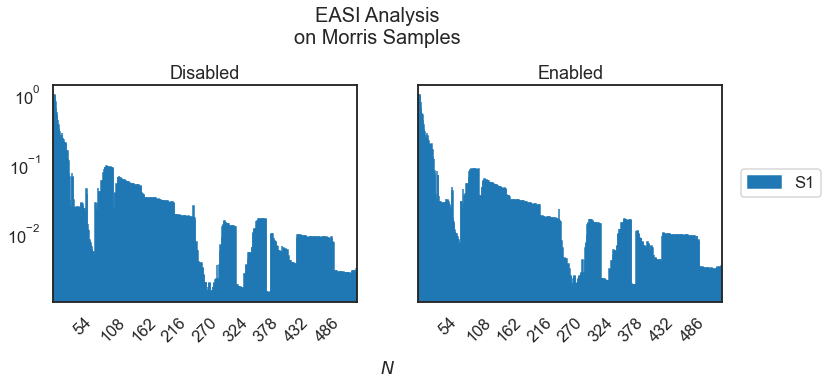

In [7]:
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)

labels = [str(i) if i % 54 == 0 else '' for i in idx]
disabled.loc[:, 'S1'].plot(kind='bar',
                           legend=None,
                           title='Disabled',
                           ax=axes[0],
                           use_index=False,
                           rot=45,
                           width=0.7,
                           edgecolor='C0', logy=True)

enabled.loc[:, 'S1'].plot(kind='bar', 
                          legend=None,
                          title='Enabled',
                          ax=axes[1],
                          use_index=False,
                          rot=45,
                          width=0.7,
                          edgecolor='C0', logy=True).legend(
                             bbox_to_anchor=(1.35, 0.65)
                          )

fig.suptitle("EASI Analysis\non Morris Samples", x=0.5, y=1.15, fontsize=20)
plt.xlabel("$N$", x=-0.1, labelpad=15);

axes[0].set_xticklabels(labels)
axes[1].set_xticklabels(labels);

In [8]:
fig.savefig(FIG_DIR+'EASI-morris_larger_sample.png', dpi=300, bbox_inches='tight')

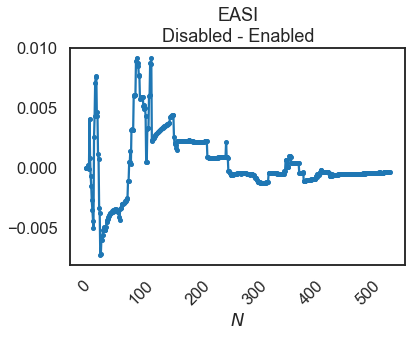

In [9]:
diff = (disabled.loc[:, 'S1'] - enabled.loc[:, 'S1']).to_frame()
ax = diff.plot(title="EASI\nDisabled - Enabled",
               rot=45,
               legend=False,
               marker='o',
               markersize=4)

ax.set_xlabel("$N$");
plt.savefig(FIG_DIR+"EASI_diff_morris.png", dpi=300, bbox_inches='tight')